In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, scale, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression
from sklearn import linear_model
from sklearn.linear_model import Ridge

d = pd.read_csv("Clean_Dataset.csv")
print("Head")
display(d.head())
print("Shape")
display(d.shape)
print("Data Types")
display(d.dtypes)
print("NAN Values")
display(d.isnull().sum())
print("Statistics")
display(d.describe().T)

FileNotFoundError: ignored

<Axes: xlabel='airline'>

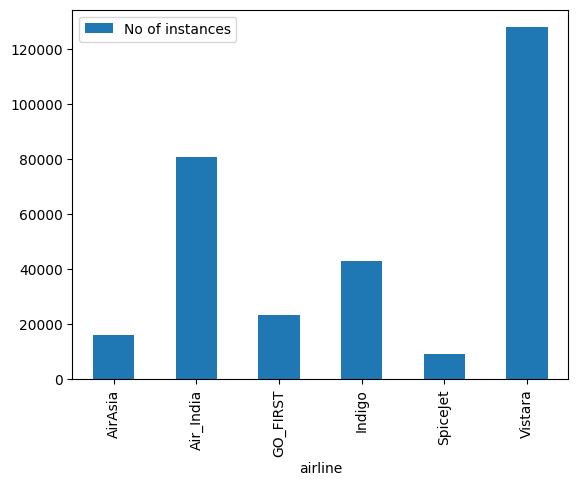

In [ ]:
x=d.groupby('airline').count()
x=x[['Unnamed: 0']]
x.columns=['No of instances']
x.plot.bar()

<Axes: xlabel='stops'>

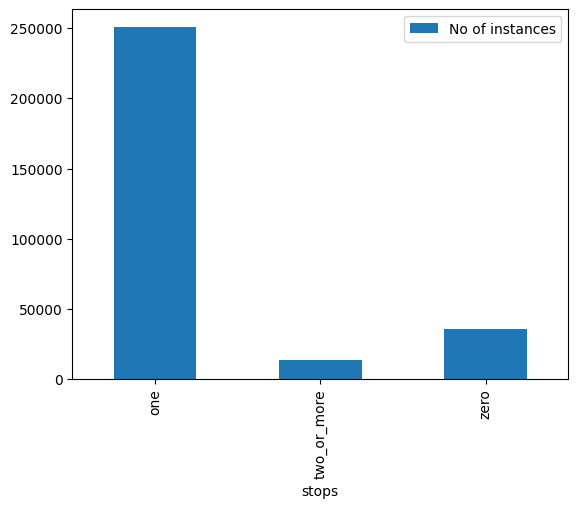

In [ ]:
x=d.groupby('stops').count()
x=x[['Unnamed: 0']]
x.columns=['No of instances']
x.plot.bar()

<Axes: ylabel='No of instances'>

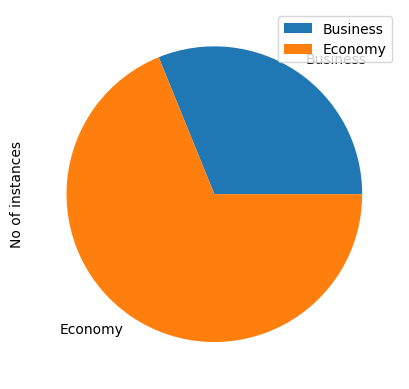

In [ ]:
x=d.groupby('class').count()
x=x[['Unnamed: 0']]
x.columns=['No of instances']
x.plot.pie(y='No of instances')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
d = d.dropna(axis=0)
numerical_features = d.select_dtypes(include=['float64', 'int64']).columns
non_integer_columns = d.select_dtypes(exclude=['int', 'int64', 'float', 'float64']).columns
label_encoder = LabelEncoder()
for col in non_integer_columns:
    d[col] = label_encoder.fit_transform(d[col])
for col in non_integer_columns:
    d[col] = label_encoder.fit_transform(d[col])

In [ ]:
numerical_data = d[numerical_features]
scaler = StandardScaler()
normalized_data = scaler.fit_transform(numerical_data)
d = pd.DataFrame(normalized_data, columns=numerical_features)

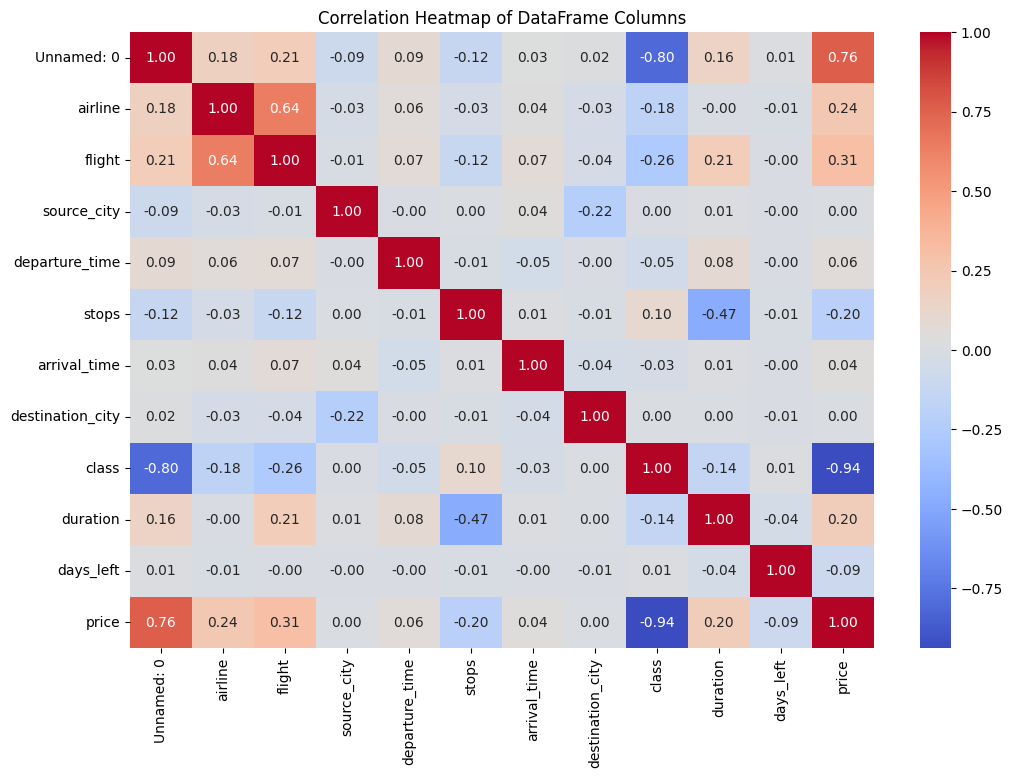

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(d.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of DataFrame Columns')
plt.show()

In [ ]:
d =d.sample(frac=0.1, random_state=42)

In [ ]:
x = d.drop(['price'], axis=1)
y = d['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
y_test_pred = model.predict(x_test)
mse = mean_squared_error(y_train, y_train_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_train,y_train_pred)
mae = mean_absolute_error(y_train, y_train_pred)
print("Training data:")
print("Mean squared error: ", mse)
print("R2: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)
mse = mean_squared_error(y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_test_pred)
mae = mean_absolute_error(y_test ,y_test_pred)
print("")
print("Testing data:")
print("Mean squared error: ", mse)
print("R2: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

Training data:
Mean squared error:  48682064.266193606
R2:  0.9056384604602747
RMSE:  6977.253346854592
MAE:  4577.465616166367

Testing data:
Mean squared error:  50726451.0681582
R2:  0.9007713868848665
RMSE:  7122.250421612413
MAE:  4621.866133339655


In [ ]:
lasso_reg = linear_model.Lasso(alpha = 50, max_iter=100, tol=0.1)
lasso_reg.fit(x_train, y_train)
lasso_reg.fit(x_test, y_test)
train_predicted = lasso_reg.predict(x_train)
test_predicted = lasso_reg.predict(x_test)
print("Using L1 linearization: ")
mse = mean_squared_error(y_train, train_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)
mae = mean_absolute_error(y_train, train_predicted)
print("Training data:")
print("Mean squared error: ", mse)
print("R2: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)
mse = mean_squared_error(y_test, test_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predicted)
mae = mean_absolute_error(y_test, test_predicted)
print("")
print("Testing data:")
print("Mean squared error: ", mse)
print("R2: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

Using L1 linearization: 
Training data:
Mean squared error:  52744430.86955463
R2:  0.9056384604602747
RMSE:  7262.536118296048
MAE:  5060.814344422817

Testing data:
Mean squared error:  54485493.6848477
R2:  0.8934181307898639
RMSE:  7381.428973095094
MAE:  5109.484097835281


In [ ]:
ridge_reg = Ridge(alpha = 50, max_iter=100, tol=0.1)
ridge_reg.fit(x_train, y_train)
ridge_reg.fit(x_test, y_test)
train_predicted = ridge_reg.predict(x_train)
test_predicted = ridge_reg.predict(x_test)
print("Using L2 linearization: ")
mse = mean_squared_error(y_train, train_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)
mae = mean_absolute_error(y_train, train_predicted)
print("Training data:")
print("Mean squared error: ", mse)
print("R2: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)
mse = mean_squared_error(y_test, test_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, test_predicted)
mae = mean_absolute_error(y_test, test_predicted)
print("")
print("Testing data:")
print("Mean squared error: ", mse)
print("R2: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

Using L2 linearization: 
Training data:
Mean squared error:  50307812.18578602
R2:  0.9056384604602747
RMSE:  7092.800024375847
MAE:  4833.378690827309

Testing data:
Mean squared error:  52046807.49502029
R2:  0.8981885699462413
RMSE:  7214.347336732568
MAE:  4868.066852082399


In [ ]:
x = scale(x)
y = scale(y)
xtrain, xtest, ytrain, ytest=train_test_split(x, y, test_size=0.15)
sgdr = SGDRegressor()
sgdr.fit(xtrain, ytrain)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("Analytics based on SGDRegressor: ")
mse = mean_squared_error(y_train, train_predicted)
rmse = np.sqrt(mse)
r2 = r2_score(y_train, y_train_pred)
mae = mean_absolute_error(y_train, train_predicted)
print("Training data:")
print("Mean squared error: ", mse)
print("R2: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)
print("Testing data:")
print("Mean squared error: ", mse)
print("R2: ", r2)
print("RMSE: ", rmse)
print("MAE: ", mae)

Analytics based on SGDRegressor: 
Training data:
Mean squared error:  50307812.18578602
R2:  0.9056384604602747
RMSE:  7092.800024375847
MAE:  4833.378690827309
Testing data:
Mean squared error:  50307812.18578602
R2:  0.9056384604602747
RMSE:  7092.800024375847
MAE:  4833.378690827309


In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(x_train)

# Make predictions on the testing set
y_test_pred = model.predict(x_test)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("Training data:")
print("Mean squared error: ", mse_train)
print("R2: ", r2_train)
print("RMSE: ", rmse_train)
print("MAE: ", mae_train)

# Evaluate the model on the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("\nTesting data:")
print("Mean squared error: ", mse_test)
print("R2: ", r2_test)
print("RMSE: ", rmse_test)
print("MAE: ", mae_test)

Training data:
Mean squared error:  21211541.73908879
R2:  0.9588851918117716
RMSE:  4605.598955520203
MAE:  1774.2776528402464

Testing data:
Mean squared error:  34861461.06096952
R2:  0.9318057076849465
RMSE:  5904.359496251013
MAE:  2720.637847742795


In [ ]:
from sklearn.svm import SVR
model = SVR()
model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(x_train)

# Make predictions on the testing set
y_test_pred = model.predict(x_test)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("Training data:")
print("Mean squared error: ", mse_train)
print("R2: ", r2_train)
print("RMSE: ", rmse_train)
print("MAE: ", mae_train)

# Evaluate the model on the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("\nTesting data:")
print("Mean squared error: ", mse_test)
print("R2: ", r2_test)
print("RMSE: ", rmse_test)
print("MAE: ", mae_test)

Training data:
Mean squared error:  551557181.9163203
R2:  -0.06909568471110528
RMSE:  23485.254563583516
MAE:  14596.284787801198

Testing data:
Mean squared error:  545541547.3990554
R2:  -0.06716180622130108
RMSE:  23356.83085093214
MAE:  14445.580987135621


In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(x_train)

# Make predictions on the testing set
y_test_pred = model.predict(x_test)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("Training data:")
print("Mean squared error: ", mse_train)
print("R2: ", r2_train)
print("RMSE: ", rmse_train)
print("MAE: ", mae_train)

# Evaluate the model on the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("\nTesting data:")
print("Mean squared error: ", mse_test)
print("R2: ", r2_test)
print("RMSE: ", rmse_test)
print("MAE: ", mae_test)

Training data:
Mean squared error:  0.0
R2:  1.0
RMSE:  0.0
MAE:  0.0

Testing data:
Mean squared error:  18880096.95119107
R2:  0.9630676738368961
RMSE:  4345.123352816473
MAE:  1742.8579043811428


In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

# Make predictions on the training set
y_train_pred = model.predict(x_train)

# Make predictions on the testing set
y_test_pred = model.predict(x_test)

# Evaluate the model on the training set
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)
mae_train = mean_absolute_error(y_train, y_train_pred)

print("Training data:")
print("Mean squared error: ", mse_train)
print("R2: ", r2_train)
print("RMSE: ", rmse_train)
print("MAE: ", mae_train)

# Evaluate the model on the testing set
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("\nTesting data:")
print("Mean squared error: ", mse_test)
print("R2: ", r2_test)
print("RMSE: ", rmse_test)
print("MAE: ", mae_test)

Training data:
Mean squared error:  1410430.9415838956
R2:  0.9972661299994474
RMSE:  1187.6156539823376
MAE:  553.2472926036982

Testing data:
Mean squared error:  10300566.098160919
R2:  0.9798505342538566
RMSE:  3209.449500796191
MAE:  1504.3370248209228
